In [190]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [191]:
feature_columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                                'liveness', 'loudness', 'speechiness', 
                                'tempo', 'valence', 'time_signature', 'mode', 'key', "track_artist", "playlist_genre"]
scaler = StandardScaler()
encoder = LabelEncoder()

In [192]:
def load_and_preprocess_data(data_path):
        df = pd.read_csv(data_path)
        df.dropna(axis=0, inplace=True)
        df = df[feature_columns]
        df[feature_columns[-1]] = encoder.fit_transform(df[feature_columns[-1]])
        num_genres = len(set(df[feature_columns[-1]]))
        artist_features = df.groupby(['track_artist']).mean()
        scaled_features = scaler.fit_transform(artist_features)
        return scaled_features, artist_features, num_genres

In [193]:
features, artist_features, num_genres = load_and_preprocess_data("data/popular.csv") #(,12)
features.shape

(1032, 13)

In [194]:
num_genres

28

(1032, 2)


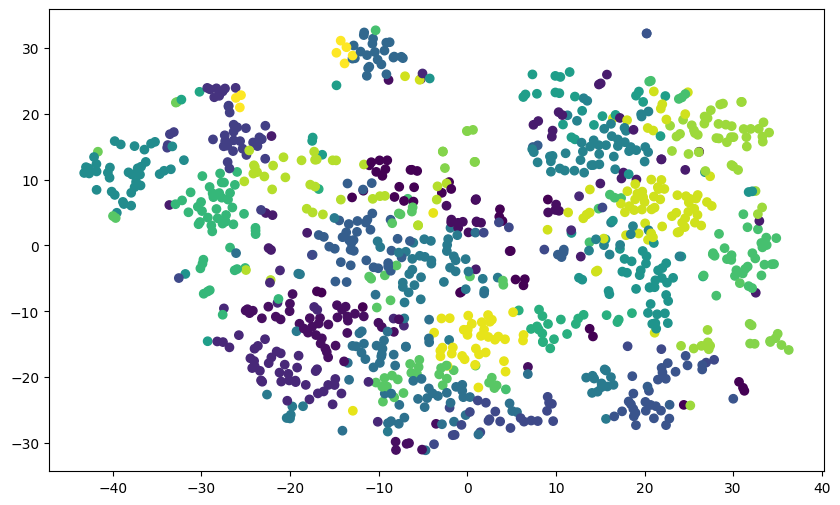

In [195]:
num_clusters = num_genres
kmeans = KMeans(n_clusters=num_clusters, random_state=92)
cluster_labels = kmeans.fit_predict(features)

from sklearn.manifold import TSNE 

reduced_features = TSNE(n_components=2, random_state=42).fit_transform(features)
print(reduced_features.shape)
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis')


In [ ]:
#now time to write code to predict this....after dinner 